# WeatherPy Analysis
----

#### Analysis:


* The max temperature increases the closer you get to the equator, just as expected.


* Cloudiness and humidity do not show a strong correlation to latitude. Cloudiness and humidity vary widely between cities at similar latitudes. Other factors, such as proximity to large bodies of water, and overall landscape probably have a more signficant impact on cloudiness and humidity. 


* Wind speed increases the farther you are from the equator. 

In [2]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#Import API key
from api_keys import api_key

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output file CSV
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

key = api_key
key

'78be8e63da757b0dd1c3325de8c1018a'

## Generate Cities List

In [3]:
#Create list for lat_lngs and cities
lat_lngs = []
cities = []

#Create random lat and lng combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Set weather api key and url
api_key = key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#Create empty lists 
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temp = []
cloudiness = []
humidity = []
wind_speed = []

#Counter 
n = 1

#Print heading
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    try: 
        json = requests.get(f"{url}&q={city}").json() 
        city_name.append(json["name"])
        country.append(json["sys"]["country"])
        date.append(json["dt"])
        latitude.append(json["coord"]["lat"])
        longitude.append(json["coord"]["lon"])
        max_temp.append(json["main"]["temp_max"])
        cloudiness.append(json["clouds"]["all"])
        humidity.append(json["main"]["humidity"])
        wind_speed.append(json["wind"]["speed"])
        city_record = json["name"]
        print(f"Processing Record {n} | {city_record}")
        
        # Increase counter 
        n = n + 1
        
        #To prevent going over API rate limit
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Port Hardy
Processing Record 2 | Marsabit
Processing Record 3 | Chapais
Processing Record 4 | Kapaa
Processing Record 5 | Srednekolymsk
Processing Record 6 | Sao Joao da Barra
Processing Record 7 | Estelle
City not found. Skipping...
Processing Record 8 | Rikitea
Processing Record 9 | Tshikapa
Processing Record 10 | Jamestown
Processing Record 11 | Bathsheba
City not found. Skipping...
Processing Record 12 | Saint-Pierre
Processing Record 13 | Barrow
Processing Record 14 | Teya
Processing Record 15 | Port Elizabeth
Processing Record 16 | Oranjestad
Processing Record 17 | Clyde River
Processing Record 18 | Ushuaia
Processing Record 19 | Kalundborg
Processing Record 20 | Mataura
Processing Record 21 | Ixtapa
Processing Record 22 | East London
Processing Record 23 | Tutoia
Processing Record 24 | Yellowknife
Processing Record 25 | Avarua
Processing Record 26 | Juanjui
Processing Record 27 | Palana
Processing Rec

Processing Record 224 | Sasykoli
Processing Record 225 | Issenye
Processing Record 226 | West Bay
Processing Record 227 | Los Llanos de Aridane
Processing Record 228 | Vanimo
Processing Record 229 | Zhigansk
Processing Record 230 | Yarmouth
Processing Record 231 | Imbituba
Processing Record 232 | Nador
Processing Record 233 | Oriental
Processing Record 234 | Chesma
City not found. Skipping...
Processing Record 235 | Bintulu
City not found. Skipping...
Processing Record 236 | Feijo
Processing Record 237 | Lamont
Processing Record 238 | Saint George
Processing Record 239 | Ilulissat
City not found. Skipping...
Processing Record 240 | Wanning
Processing Record 241 | Zvishavane
Processing Record 242 | Lagoa
Processing Record 243 | Hailin
City not found. Skipping...
Processing Record 244 | Matagami
Processing Record 245 | Poum
Processing Record 246 | Palmer
Processing Record 247 | Mount Gambier
Processing Record 248 | Nizhniy Baskunchak
Processing Record 249 | Nipawin
Processing Record 250 

Processing Record 446 | Klaksvik
Processing Record 447 | Dumbea
Processing Record 448 | Sitka
Processing Record 449 | Micomeseng
Processing Record 450 | Tolaga Bay
Processing Record 451 | Fez
City not found. Skipping...
Processing Record 452 | Lucapa
Processing Record 453 | Veinticinco de Mayo
Processing Record 454 | Pangody
Processing Record 455 | Awjilah
Processing Record 456 | Saurimo
City not found. Skipping...
Processing Record 457 | Grants
Processing Record 458 | Tilichiki
Processing Record 459 | Cherepovets
Processing Record 460 | Vila
Processing Record 461 | Hambantota
Processing Record 462 | Cueto
Processing Record 463 | Nouadhibou
Processing Record 464 | The Pas
Processing Record 465 | Grindavik
Processing Record 466 | Lima
Processing Record 467 | Yarada
City not found. Skipping...
Processing Record 468 | Makhachkala
Processing Record 469 | Erzin
Processing Record 470 | Nyurba
Processing Record 471 | El Alto
Processing Record 472 | Codrington
Processing Record 473 | Corinto
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create dictionary 
weather_dic = {
    "City": city_name,
    "Country": country,
    "Date":date,
    "Latitude": latitude, 
    "Longitude": longitude, 
    "Cloudiness": cloudiness, 
    "Humidity": humidity,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

#Build data frame
weather_df = pd.DataFrame(weather_dic)

#Data frame count
weather_df.count()

City          544
Country       544
Date          544
Latitude      544
Longitude     544
Cloudiness    544
Humidity      544
Max Temp      544
Wind Speed    544
dtype: int64

In [14]:
#Export the city data into a .csv.
weather_df.to_csv('Output_Data/city_weather_data.csv')

#Display data frame  
weather_df.head()


,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,Port Hardy,CA,1570399836,50.70,-127.42,90,93,50.00,8.05
1,Marsabit,KE,1570399871,2.34,37.99,57,47,83.54,13.00
2,Chapais,CA,1570399634,49.78,-74.86,90,93,48.20,17.22
3,Kapaa,US,1570399596,22.08,-159.32,1,69,82.40,9.17
4,Srednekolymsk,RU,1570399873,67.46,153.71,0,87,11.51,5.84


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

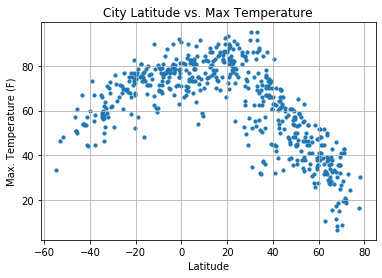

In [17]:
#Build scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o", s=10)

#Format plot
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save plot
plt.savefig("Output_Plots/Max_Temp_vs_City_Latitude.png")

#Display plot
plt.show()

#### Latitude vs. Humidity Plot

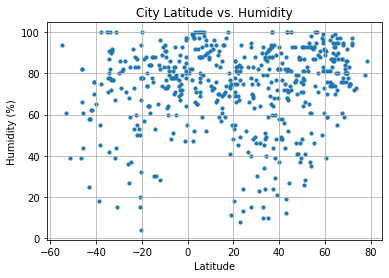

In [19]:
#Build scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", s=10)

#Format plot
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save plot
plt.savefig("Output_Plots/Humidity_vs_City_Latitude.png")

#Display plot
plt.show()


#### Latitude vs. Cloudiness Plot

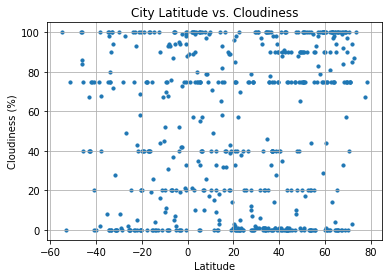

In [21]:
#Build scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", s=10)

#Format plot
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save plot
plt.savefig("Output_Plots/Cloudiness_vs_City_Latitude.png")

#Display plot
plt.show()

#### Latitude vs. Wind Speed Plot

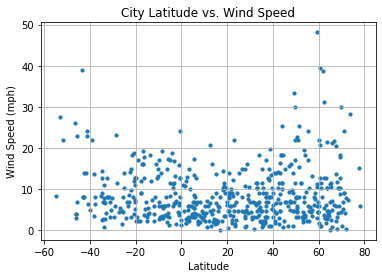

In [23]:
#Build scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o", s=10)

#Format plot
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save plot
plt.savefig("Output_Plots/Wind_Speed_vs_City_Latitude.png")

#Display plot
plt.show()